In [4]:
#%%
import networkx as nx
import igraph as ig
import pandas as pd
import seaborn as sns





# get users with most mentions



In [ ]:

full_network_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_retweets.gml'
projected_network_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_retweets_ml.gml'


# load network
g = ig.read(full_network_path, format='gml')

In [2]:
# %%
# some statistics about the network
#number of nodes bipartite = 1 (user)

# %%
tweets = g.vs.select(bipartite=1)
user = g.vs.select(bipartite=0)

print('Number of tweets: ', len(tweets))
print('Number of users: ', len(user))


# %%
# outdegree for users 
user_outdegree = g.degree(user, mode='out')
# histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Number of tweets:  454754
Number of users:  134212


# Users 

In [8]:
user_outdegree = g.degree(user, mode='out')
user_indegree = g.degree(user, mode='in')
df_user_degree = pd.DataFrame({'user': user['label'], 'mentions': user_indegree, 'tweets': user_outdegree})
df_user_degree



(0.0, 0.8255314580201847)

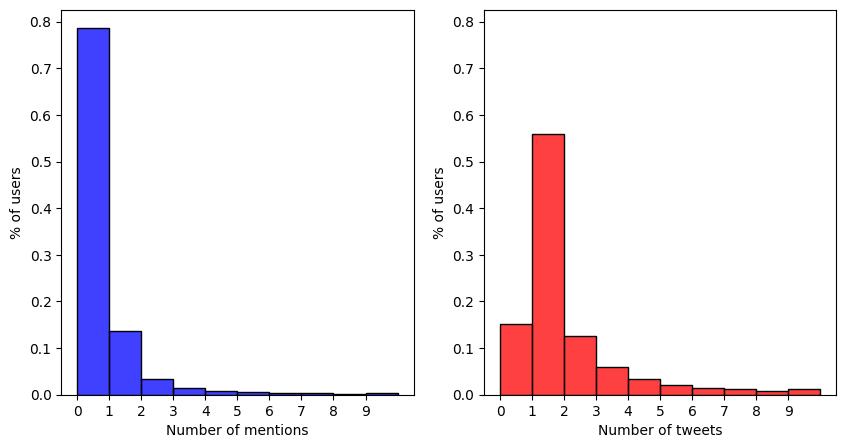

In [19]:
# two plots in one figure seaborn 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df_user_degree['mentions'], ax=ax[0], bins=bins, kde=False, color='blue', stat='probability')
sns.histplot(df_user_degree['tweets'], ax=ax[1], bins=bins, kde=False, color='red', stat='probability')
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
ax[0].set_xlabel('Number of mentions')
ax[1].set_xlabel('Number of tweets')
ax[0].set_ylabel('% of users')
ax[1].set_ylabel('% of users')
# same y axis
ax[1].set_ylim(ax[0].get_ylim())


# Tweets

In [33]:
tweets_outdegree = g.degree(tweets, mode='out')
tweets_indegree = g.degree(tweets, mode='in')
df_tweets_degree = pd.DataFrame({'tweet': tweets['label'], 'retweets': tweets_indegree })
# remove one because it is the edge from the user 
df_tweets_degree['retweets'] = df_tweets_degree['retweets'] - 1 

df_tweets_degree.sort_values('retweets', ascending=False).head(20)





,tweet,retweets
12647,800010279136305152,2984
57001,797251350996385792,1166
27156,798922305241903104,1075
63932,796750685068881920,1032
52733,797641421704613888,920
21255,799254916837634048,801
16791,799589038239846401,668
71703,796243139015024641,646
18115,799510718496309248,601
21769,799236513745600512,566


https://twitter.com/LeoDiCaprio/status/800010279136305152
https://twitter.com/WWF/status/797251350996385792
https://twitter.com/Maersk/status/798922305241903104
https://twitter.com/UNICEF/status/796750685068881920

<Axes: xlabel='retweets', ylabel='Probability'>

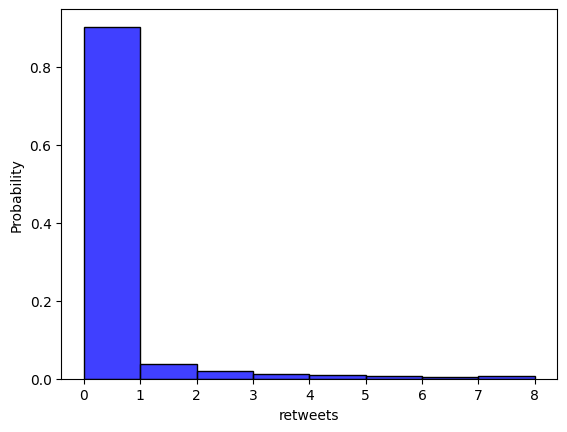

In [32]:
# histoplot 
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
sns.histplot(df_tweets_degree['retweets'], bins=bins, kde=False, color='blue', stat='probability')

In [35]:
# how many 0 retweets 
print('tweets with 0 retweets: ',len(df_tweets_degree[df_tweets_degree['retweets'] == 0]))

tweets with 0 retweets 404026


In [ ]:
# remove edges from tweets to users 
